<a href="https://colab.research.google.com/github/EltonGS/Bootcamp-Data-Science-Alura/blob/main/Notebooks/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando as bibliotecas a serem utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# endereços dos dados
url_casos = 'https://raw.githubusercontent.com/EltonGS/vacinacao_bcg_estados/main/Dados_Tratados/dados_casos_tb.csv'
url_vac = 'https://raw.githubusercontent.com/EltonGS/vacinacao_bcg_estados/main/Dados_Tratados/dados_vac_tb.csv'

# lendo os dados já tratados
dados_casos_tb = pd.read_csv(url_casos)
dados_vac_tb = pd.read_csv(url_vac)

In [2]:
# função para definir a coluna com o ano como um dado do tipo datetime
def definir_ano (ano: str):
  ano_int = int(ano)
  
  return date(ano_int, 1, 1)

# mapeando a função definida acima para manipular os valores da coluna ano
dados_casos_tb['ano'] = dados_casos_tb['ano'].map(definir_ano)
dados_vac_tb['ano'] = dados_vac_tb['ano'].map(definir_ano)

# transformando os valores da coluna em um dado do tipo datetime64
dados_casos_tb['ano'] = dados_casos_tb['ano'].astype('datetime64')
dados_vac_tb['ano'] = dados_vac_tb['ano'].astype('datetime64')

In [3]:
# somando os casos com base nos anos para verificar os casos de turberculose no Brasil
casos_por_ano = dados_casos_tb.groupby('ano').sum().reset_index()
casos_por_ano['ano'] = casos_por_ano['ano'].dt.year

<Figure size 1008x1008 with 0 Axes>

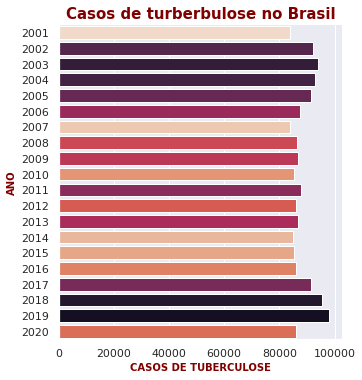

In [10]:
#plotando o gráfico para visualizar os dados do Brasil
sns.set_theme()
plt.figure(figsize=(14, 14))
ax = sns.catplot(data=casos_por_ano, x='n_casos_tb', hue='n_casos_tb', dodge=False, y='ano', kind='bar', palette=sns.color_palette("rocket_r", 20),
            legend=False, orient='h')

plt.title('Casos de turberbulose no Brasil', fontsize=15, fontweight='bold', color='maroon')
plt.ylabel('ANO', fontsize=10, fontweight='bold', color='maroon')
plt.xlabel('CASOS DE TUBERCULOSE', fontsize=10, fontweight='bold', color='maroon')
plt.show()